In [1]:
#importing all necessary lib
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,Bidirectional

In [2]:
#loading the imdb dataset
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=10000)

#pad the seq to have same length
X_train=pad_sequences(X_train,maxlen=100)
X_test=pad_sequences(X_test,maxlen=100)

In [10]:
#define you rnn model
model=Sequential([
    Embedding(10000,32),
    SimpleRNN(5,return_sequences=True),
    SimpleRNN(5),
    Dense(1,activation='sigmoid'),
])
model.build(input_shape=(None, 100))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 100, 5)              │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,251 (1.22 MB)

 Trainable params: 320,251 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

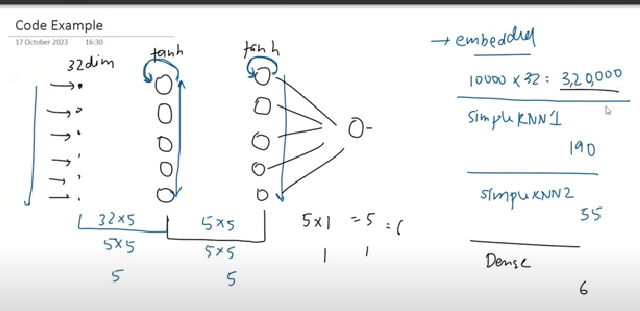

In [4]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
#train the model
history=model.fit(X_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6662 - loss: 0.6063 - val_accuracy: 0.7948 - val_loss: 0.4527
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8601 - loss: 0.3537 - val_accuracy: 0.8164 - val_loss: 0.4227
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9108 - loss: 0.2430 - val_accuracy: 0.8214 - val_loss: 0.4464
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9452 - loss: 0.1648 - val_accuracy: 0.7948 - val_loss: 0.5209
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9562 - loss: 0.1342 - val_accuracy: 0.8116 - val_loss: 0.5605


In [9]:
#bidir rnn
embedded_dim=32
model=Sequential([
    Embedding(input_dim=10000,output_dim=embedded_dim,input_length=100),
    Bidirectional(SimpleRNN(5)),
    Dense(1,activation='sigmoid')
])
#compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.build(input_shape=(None, 100))
#display
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 10)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,391 (1.22 MB)

 Trainable params: 320,391 (1.22 MB)

 Non-trainable params: 0 (0.00 B)